<a href="https://colab.research.google.com/github/Cas0801/TrendRadar/blob/master/%E2%80%9CGroup_X_Project_FINAL_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singapore Population Regression (Final Submission)

**Dataset:** Singapore Population (1950–2022, SingStat)

This notebook:
1. Cleans the official SingStat Excel table
2. Constructs a machine-learning-ready dataset (Year, Population)
3. Trains a linear regression model
4. Evaluates performance and predicts future population

⚠️ Run cells **from top to bottom** (Run All).

## 1. Load and Clean Raw SingStat Excel

In [1]:

# ===============================
# Imports
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# ===============================
# Load and Clean Raw SingStat Excel (FINAL SAFE VERSION)
# ===============================
import pandas as pd

raw = pd.read_excel("Singapore-Population-1950-2022.xlsx", header=None)

# Convert to numeric safely (invalid -> NaN)
years = pd.to_numeric(raw.iloc[8, 1:], errors="coerce")
population = pd.to_numeric(raw.iloc[9, 1:], errors="coerce")

# Build DataFrame
df = pd.DataFrame({
    "Year": years,
    "Population": population
})

# Drop invalid columns
df = df.dropna()

# Convert types AFTER cleaning
df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(float)

# Sort by year
df = df.sort_values("Year").reset_index(drop=True)

# Safety check
assert list(df.columns) == ["Year", "Population"]

df.head()


,Year,Population


In [ ]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


df shape: (0, 2)
Empty DataFrame
Columns: [Year, Population]
Index: []
Empty DataFrame
Columns: [Year, Population]
Index: []


## 2.Problem solution

a.Divide the data into the training set and the test set according to the year

In [ ]:

X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# Training: Year ≤ 2020
train_mask = df["Year"] <= 2020
# Testing: Year > 2021
test_mask = df["Year"] > 2021

X_train, y_train = X[train_mask], y[train_mask]
X_test, y_test = X[test_mask], y[test_mask]

len(X_train), len(X_test)


(0, 0)

b.Check the structure and content of the data frame df

In [ ]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


df shape: (0, 2)
Empty DataFrame
Columns: [Year, Population]
Index: []
Empty DataFrame
Columns: [Year, Population]
Index: []


## 3. Linear Regression Model

Read Singapore's population data from Excel files and conduct the final data cleaning and organization



In [ ]:
# ===============================
# FINAL SAFE CLEANING (DO NOT CHANGE)
# ===============================
raw = pd.read_excel("Singapore-Population-1950-2022.xlsx", header=None)

years = pd.to_numeric(raw.iloc[8, 1:], errors="coerce")
population = pd.to_numeric(raw.iloc[9, 1:], errors="coerce")

df = pd.DataFrame({
    "Year": years.values,
    "Population": population.values
})

# Only retain the data with the Year within a reasonable range
df = df[
    (df["Year"].notna()) &
    (df["Population"].notna()) &
    (df["Year"] >= 1950)
]

df["Year"] = df["Year"].astype(int)
df["Population"] = df["Population"].astype(float)

df = df.sort_values("Year").reset_index(drop=True)

print("Year range:", df["Year"].min(), "-", df["Year"].max())
df.head()


Year range: nan - nan


,Year,Population


In [ ]:
print("df shape:", df.shape)
print(df.head())
print(df.tail())


df shape: (0, 2)
Empty DataFrame
Columns: [Year, Population]
Index: []
Empty DataFrame
Columns: [Year, Population]
Index: []


## 4. Visualization

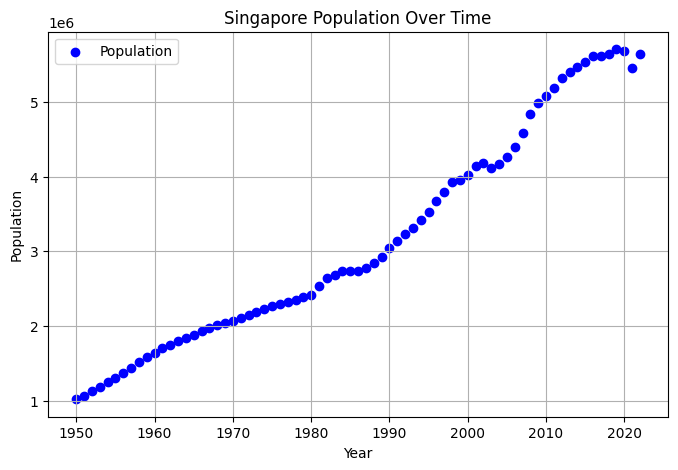

In [17]:
import matplotlib.pyplot as plt

# X 和 y
X = df["Year"].values
y = df["Population"].values

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color="blue", label="Population")

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Singapore Population Over Time")
plt.legend()
plt.grid(True)
plt.show()


slope: 67334.07685425153
y-intercept: -130562088.09829696


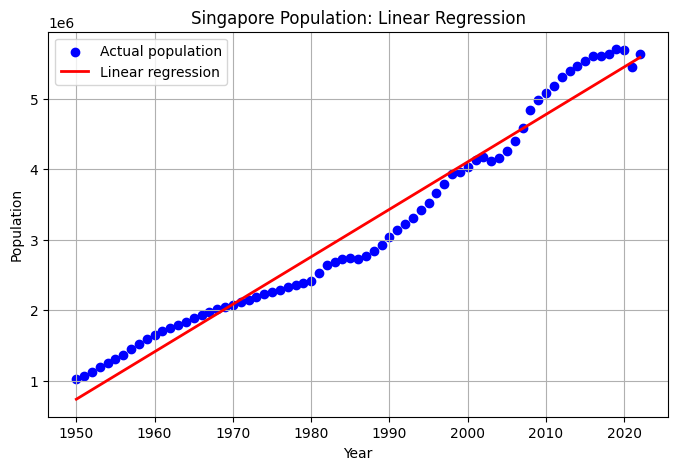

R^2: 0.967578693923587
MSE: 67452336883.76343
slope: 67334.07685425153
y-intercept: -130562088.09829696


In [16]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# X 和 y
X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# =========================
# Linear Regression
# =========================
lin_model = LinearRegression()
lin_model.fit(X, y)

# Predict for plotting
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_line = lin_model.predict(X_line)

# Print slope and intercept (optional but recommended)
print("slope:", lin_model.coef_[0])
print("y-intercept:", lin_model.intercept_)

# =========================
# Plot
# =========================
plt.figure(figsize=(8, 5))

plt.scatter(X, y, color="blue", label="Actual population")
plt.plot(X_line, y_line, color="red", linewidth=2, label="Linear regression")


plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Singapore Population: Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import r2_score, mean_squared_error

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X, y)


y_pred = lin_model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print("R^2:", r2)
print("MSE:", mse)
# ========================

# Predict for plotting
X_line = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_line = lin_model.predict(X_line)

# Print slope and intercept
print("slope:", lin_model.coef_[0])
print("y-intercept:", lin_model.intercept_)




## 5. Future Population Estimates

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# ===============================
# Train / Test Split (ROBUST VERSION)
# ===============================
X = df["Year"].values.reshape(-1, 1)
y = df["Population"].values

# Sort by time (ensure causality)
idx = np.argsort(X.flatten())
X = X[idx]
y = y[idx]


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train samples:", len(X_train))
print("Test samples:", len(X_test))

# ===============================
# Train model
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================
# Future population estimates
# ===============================
for year in [2025, 2030, 2050]:
    estimate = model.predict(np.array([[year]]))[0]
    print(f"Estimated population in {year}: {estimate:,.0f}")


Train samples: 58
Test samples: 15
Estimated population in 2025: 5,264,920
Estimated population in 2030: 5,553,352
Estimated population in 2050: 6,707,077
